In [49]:
import sys
import copy
sys.path.insert(0, "..")
import numpy as np
import matplotlib.pyplot as plt
from classes.kmeans import KMeans
from sklearn.cluster import DBSCAN
import matplotlib as mpl

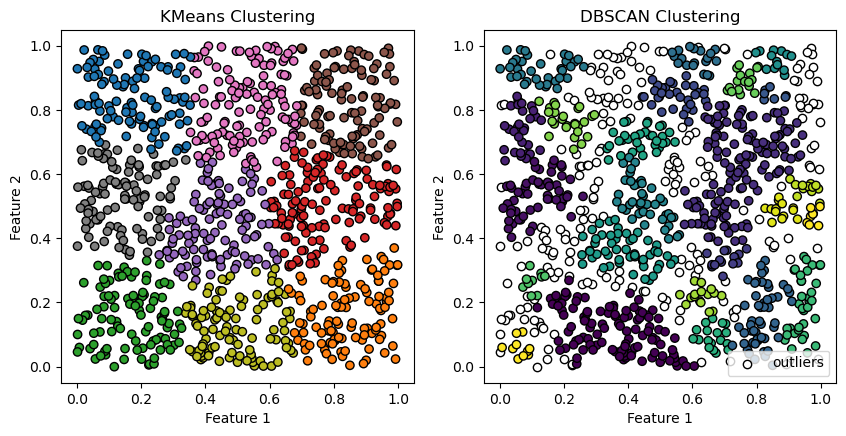

In [56]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].set_title("KMeans Clustering")
axs[1].set_title("DBSCAN Clustering")

for ax in axs:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_aspect('equal')

X = np.random.rand(1000, 2)  # 1000 data points, 2 features

kmeans = KMeans(n_clusters=9, max_iter=300)
init_mus = np.random.rand(9, 2)
kmeans.fit(X, init_mus=init_mus)

labels = kmeans.predict(X)
axs[0].scatter(X[:,0],X[:,1],c=[f'C{l}' for l in labels], edgecolor="k")


dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_

cmap=mpl.cm.viridis
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
bounds = np.linspace(0, np.max(labels), n_clusters_)
cnorm = mpl.colors.BoundaryNorm(bounds, cmap.N)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
p_outs = []
p_ins = []
l_ins = []
for label, x_point in zip(labels, X):
    if label == -1:
        p_outs.append(x_point)
    else:
        p_ins.append(x_point)
        l_ins.append(label)

p_outs = np.array(p_outs)
p_ins = np.array(p_ins)

axs[1].scatter(p_outs[:,0],p_outs[:,1],c="white", edgecolor="k", label="outliers")
axs[1].scatter(p_ins[:,0],p_ins[:,1],c=[cmap(cnorm(l_in)) for l_in in l_ins], edgecolor="k")
axs[1].legend()